# Importar Librerías Necesarias
Importar las librerías necesarias como pandas, numpy, matplotlib y seaborn.

In [228]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar los estilos de los gráficos
sns.set(style="whitegrid")

# Buscar y Descargar Datos
Buscar y descargar los datos del Índice para una Vida Mejor de la OCDE y el PIB per cápita del Banco Mundial desde los enlaces proporcionados.

In [229]:
# Buscar y Descargar Datos

# URL de los datos
url_ocde = "betterLifeIndex.csv"

# Descargar los datos del Índice para una Vida Mejor de la OCDE
df_ocde = pd.read_csv(url_ocde)


# Mostrar las primeras filas de cada DataFrame para verificar la descarga
print(df_ocde.head())

  STRUCTURE      STRUCTURE_ID     STRUCTURE_NAME ACTION LOCATION  Country  \
0  DATAFLOW  OECD:DF_BLI(1.0)  Better Life Index      I      EST  Estonia   
1  DATAFLOW  OECD:DF_BLI(1.0)  Better Life Index      I      GRC   Greece   
2  DATAFLOW  OECD:DF_BLI(1.0)  Better Life Index      I      DEU  Germany   
3  DATAFLOW  OECD:DF_BLI(1.0)  Better Life Index      I      FRA   France   
4  DATAFLOW  OECD:DF_BLI(1.0)  Better Life Index      I      FIN  Finland   

  INDICATOR          Indicator MEASURE Measure  ... OBS_VALUE  \
0   SW_LIFS  Life satisfaction       L   Value  ...       6.5   
1   SW_LIFS  Life satisfaction       L   Value  ...       5.8   
2   SW_LIFS  Life satisfaction       L   Value  ...       7.3   
3   SW_LIFS  Life satisfaction       L   Value  ...       6.7   
4   SW_LIFS  Life satisfaction       L   Value  ...       7.9   

   Observation Value  OBS_STATUS  Observation Status UNIT_MEASURE  \
0                NaN           A                 NaN      AVSCORE   
1       

In [230]:
# URL de los datos
url_banco_mundial = "pib.csv"
# Descargar los datos del PIB per cápita del Banco Mundial

df_banco_mundial = pd.read_csv(url_banco_mundial)
# Mostrar las primeras filas de cada DataFrame para verificar la descarga

print(df_banco_mundial.head())


        Entity Code  Year  GDP per capita
0  Afghanistan  AFG  2002       1280.4631
1  Afghanistan  AFG  2003       1292.3335
2  Afghanistan  AFG  2004       1260.0605
3  Afghanistan  AFG  2005       1352.3207
4  Afghanistan  AFG  2006       1366.9932


# Cargar Datos en DataFrames
Cargar los datos descargados en DataFrames de pandas para su manipulación.

In [ ]:
# Cargar Datos en DataFrames

# Cargar los datos del Índice para una Vida Mejor de la OCDE en un DataFrame
df_ocde = pd.read_csv(url_ocde)

# Cargar los datos del PIB per cápita del Banco Mundial en un DataFrame
df_banco_mundial = pd.read_csv(url_banco_mundial)


df_banco_mundial = df_banco_mundial[['Entity', 'Code', 'Year', 'GDP per capita']]
df_banco_mundial.rename(columns={'Entity': 'Country', 'GDP per capita': 'GDP per capita'}, inplace=True)
df_banco_mundial = df_banco_mundial.groupby('Country')['GDP per capita'].mean().reset_index()

# Filtrar países que están presentes en ambos DataFrames
df_banco_mundial = df_banco_mundial[df_banco_mundial['Country'].isin(df_ocde['Country'])]


df_ocde = df_ocde[['Country', 'OBS_VALUE']]
df_ocde.rename(columns={'OBS_VALUE': 'Satisfaction'}, inplace=True)

# Mostrar las primeras filas de cada DataFrame para verificar la descarga
print(df_ocde)
print(df_banco_mundial)

            Country  GDP per capita
8         Australia    41516.085364
9           Austria    48378.667485
16          Belgium    44983.853303
24           Brazil    12977.469424
31           Canada    42721.646000
36            Chile    18789.395727
38         Colombia    11310.060818
41       Costa Rica    15280.341318
46          Czechia    30443.102636
48          Denmark    49726.302636
58          Estonia    26482.617571
64          Finland    41722.040545
65           France    40504.963061
69          Germany    45718.021758
71           Greece    29560.474364
81          Hungary    23705.262875
82          Iceland    47641.174786
87          Ireland    56089.400364
88           Israel    34093.928143
89            Italy    41438.975394
91            Japan    37724.032758
101          Latvia    21493.230143
106       Lithuania    24415.601286
109      Luxembourg   102609.599636
120          Mexico    18908.370788
133     Netherlands    48606.815515
134     New Zealand    36032

# Unir y Ordenar Tablas
Unir las tablas obtenidas en un solo DataFrame y ordenarlas por PIB per cápita.

0             Estonia
1              Greece
2             Germany
3              France
4             Finland
5             Denmark
6             Czechia
7              Canada
8             Belgium
9             Austria
10          Australia
11              Chile
12             Brazil
13      United States
14     United Kingdom
15            Türkiye
16        Switzerland
17             Sweden
18              Spain
19    Slovak Republic
20           Portugal
21             Poland
22             Norway
23        New Zealand
24        Netherlands
25             Mexico
26         Luxembourg
27              Korea
28              Japan
29              Italy
30            Ireland
31            Iceland
32            Hungary
33         Costa Rica
34          Lithuania
35           Colombia
36       OECD - Total
37       South Africa
38           Slovenia
39             Russia
40             Latvia
41             Israel
Name: Country, dtype: object
8           Australia
9             Austria
16 

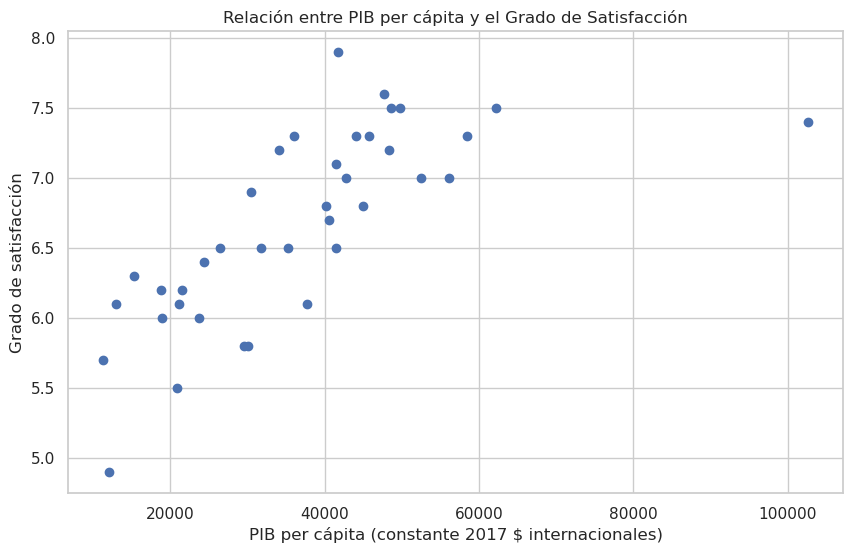

Conclusiones:
1. Analiza la relación entre el PIB per cápita y el grado de satisfacción.
2. Observa si hay una tendencia clara entre estos dos indicadores.


In [232]:
print(df_ocde["Country"])
print(df_banco_mundial["Country"])

# Unir las tablas por el país
merged_df = pd.merge(df_banco_mundial, df_ocde, on='Country')

# Ordenar por PIB per cápita
merged_df.sort_values(by='GDP per capita', ascending=False, inplace=True)

# Guardar el archivo resultante en un nuevo CSV
merged_df.to_csv('merged_data.csv', index=False)

# Mostrar primeras filas del DataFrame combinado
print(merged_df.head())

# # Análisis de datos y representación gráfica
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['GDP per capita'], merged_df['Satisfaction'])
plt.xlabel('PIB per cápita (constante 2017 $ internacionales)')
plt.ylabel('Grado de satisfacción')
plt.title('Relación entre PIB per cápita y el Grado de Satisfacción')
plt.grid(True)
plt.show()

# # Conclusiones
print("Conclusiones:")
print("1. Analiza la relación entre el PIB per cápita y el grado de satisfacción.")
print("2. Observa si hay una tendencia clara entre estos dos indicadores.")

          Country  GDP per capita  Satisfaction
23     Luxembourg   102609.599636           7.4
35    Switzerland    62161.425606           7.5
27         Norway    58485.505636           7.3
17        Ireland    56089.400364           7.0
37  United States    52472.930030           7.0


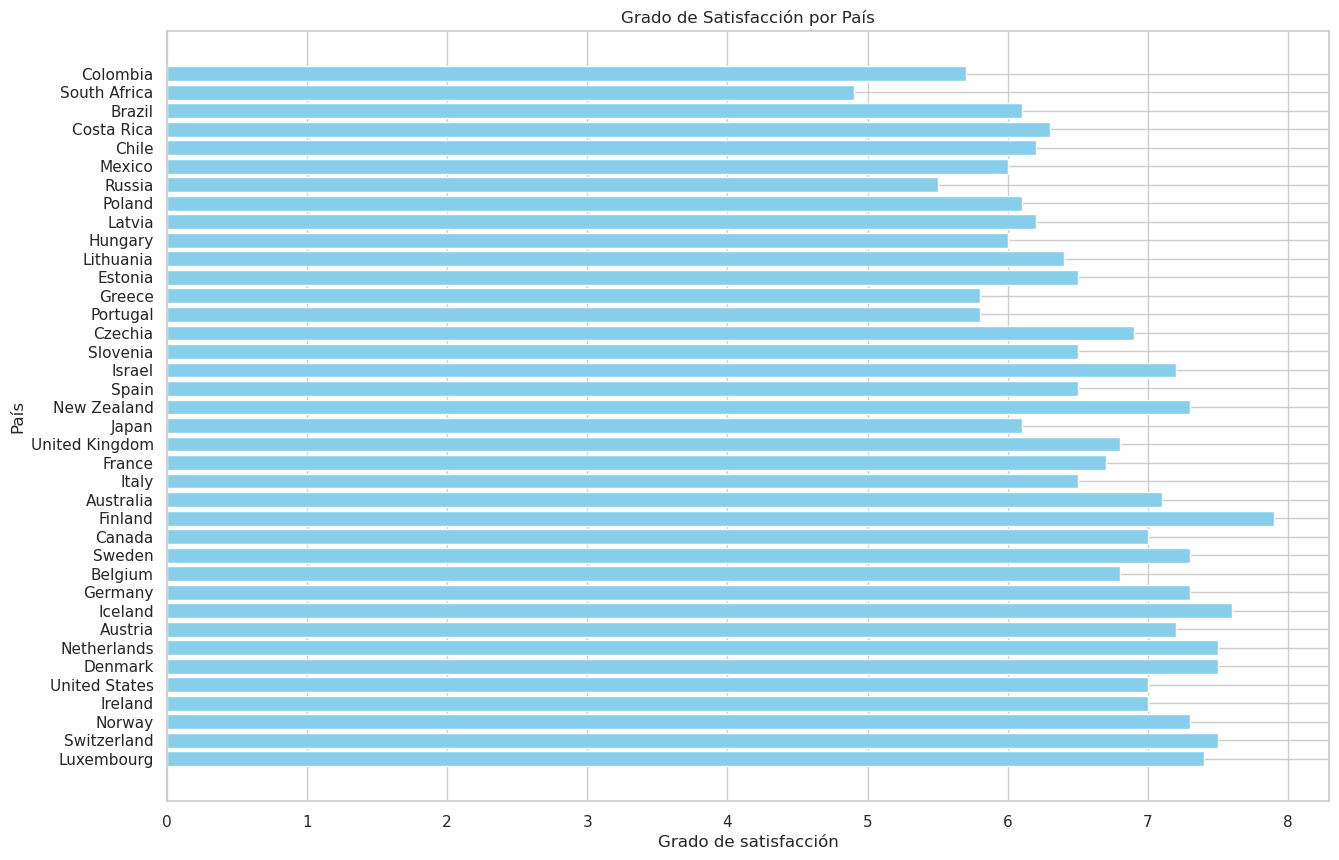

Conclusiones:
1. Analiza la relación entre el PIB per cápita y el grado de satisfacción.
2. Observa si hay una tendencia clara entre estos dos indicadores.


In [233]:
# Ordenar por PIB per cápita
merged_df.sort_values(by='GDP per capita', ascending=False, inplace=True)

# Guardar el archivo resultante en un nuevo CSV
merged_df.to_csv('merged_data.csv', index=False)

# Mostrar primeras filas del DataFrame combinado
print(merged_df.head())

# Análisis de datos y representación gráfica por país
plt.figure(figsize=(15, 10))
plt.barh(merged_df['Country'], merged_df['Satisfaction'], color='skyblue')
plt.xlabel('Grado de satisfacción')
plt.ylabel('País')
plt.title('Grado de Satisfacción por País')
plt.grid(True)
plt.show()

# Conclusiones
print("Conclusiones:")
print("1. Analiza la relación entre el PIB per cápita y el grado de satisfacción.")
print("2. Observa si hay una tendencia clara entre estos dos indicadores.")